<a href="https://colab.research.google.com/github/szh141/colab/blob/main/convolution_and_windowed_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'target')

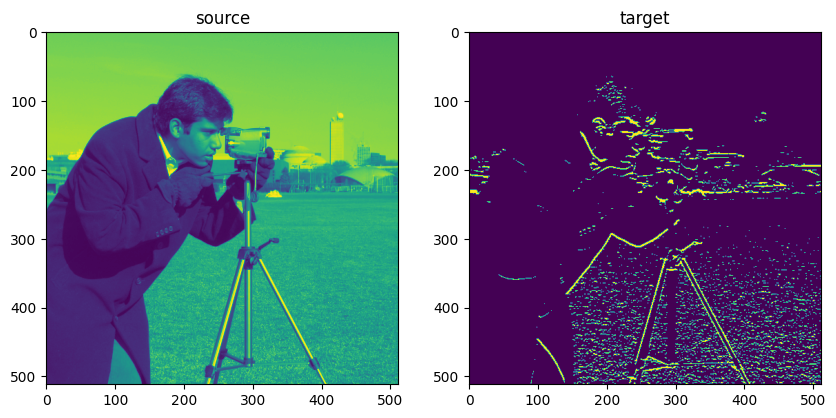

In [ ]:
from skimage import data,filters,util
import numpy as np
from matplotlib import pyplot as plt
img = data.camera()
img_filtered = filters.sobel_h(img)
target = img_filtered >0.07

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(img)
ax[0].set_title('source')
ax[1].imshow(target)
ax[1].set_title('target')

In [ ]:
?filters.sobel_h
kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

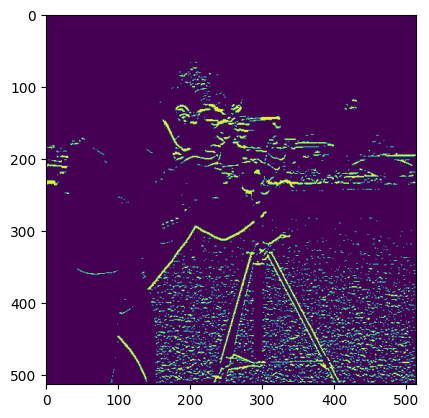

In [ ]:
from scipy.signal import convolve
from skimage import img_as_float
img_convolved = convolve(img,kernel)
plt.imshow(img_convolved>70)

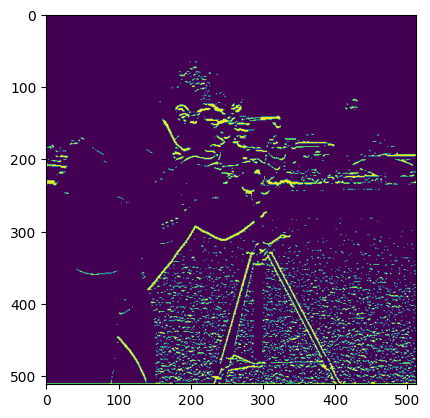

In [ ]:
kernel_pad = np.pad(kernel, (255,254), 'constant') #FFT multiplication needs two images of the same dimension
kernel_pad_shift = np.fft.fftshift(kernel_pad)
img_FFT_convolved = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel_pad_shift)).real
plt.imshow(img_FFT_convolved>70)
# TINA convolution using FFT
# https://github.com/True-North-Intelligent-Algorithms/tnia-python/blob/030d08b426678cbf23b53276b2e515399fed9f38/notebooks/imagesc/2024_01_16_fft_vs_fft2/fft_shift.ipynb

(510, 510, 3, 3)
(510, 510, 1, 9)
(510, 510, 9, 1)
(510, 510, 1, 1)
784.0


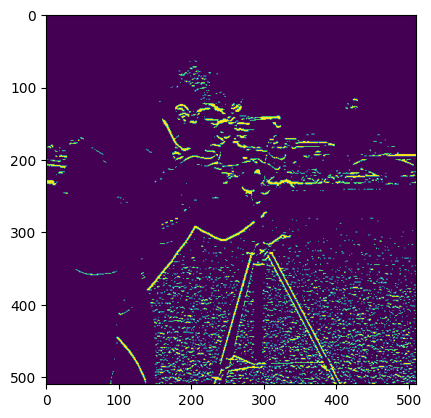

In [ ]:
windowed_img = util.view_as_windows(img,(3,3))
print(windowed_img.shape)
windowed_img_reshape = windowed_img.reshape(510,510,1,9)
print(windowed_img_reshape.shape)

#kernel2 = np.repeat(kernel[np.newaxis,:,:], repeats=510, axis=0)
#https://forum.image.sc/t/image-filtering-with-sobel-h/91658/4
#https://en.wikipedia.org/wiki/Convolution#cite_note-1

kernel2 = np.repeat(kernel[np.newaxis,::-1,::-1], repeats=510, axis=0)
kernel3 = np.repeat(kernel2[np.newaxis,:,:,:], repeats=510, axis=0)
kernel4 =kernel3.reshape(510,510,9,1)
print(kernel4.shape)

product = windowed_img_reshape@kernel4
print(product.shape)

img_product = np.zeros((510,510))
for i in range(510):
  for j in range(510):
    img_product[i,j] = product[i,j]
print(img_product.max())
plt.imshow(img_product>70)

Text(0.5, 1.0, 'kernel_multiplied')

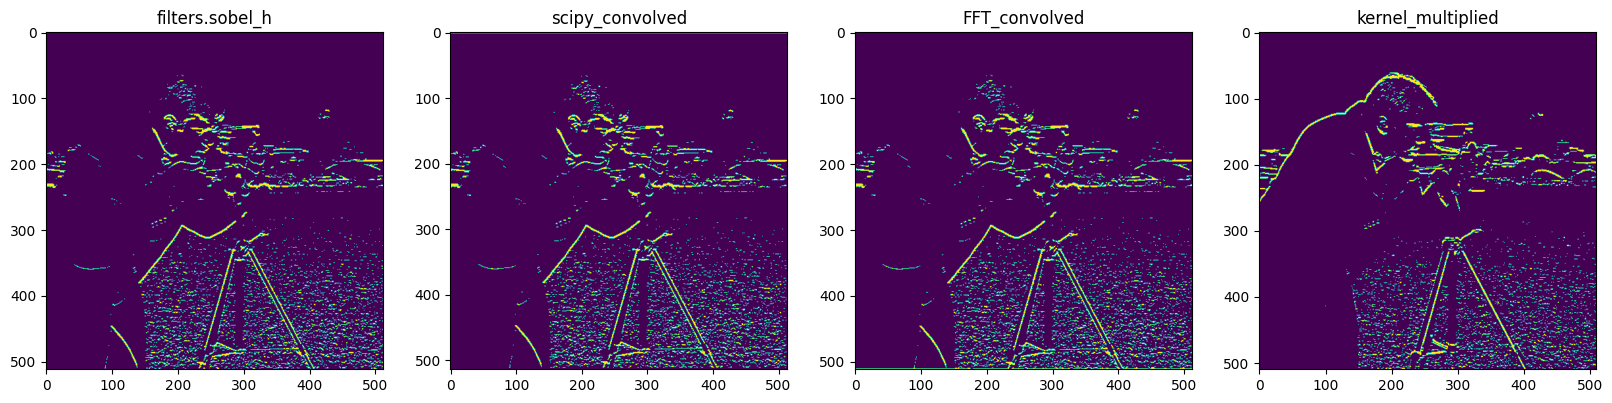

In [ ]:
fig,ax = plt.subplots(1,4,figsize = (20,6))
ax[0].imshow(img_filtered>0.07)
ax[0].set_title('filters.sobel_h')
ax[1].imshow(img_convolved>70)
ax[1].set_title('scipy_convolved')
ax[2].imshow(img_FFT_convolved>70)
ax[2].set_title('FFT_convolved')
ax[3].imshow(img_product>80)
ax[3].set_title('kernel_multiplied')